Found 3065 .mat files to process
⚠️ Error reading /kaggle/input/figshare-datset/cvind.mat: "Unable to synchronously open object (object 'cjdata' doesn't exist)"
✅ Conversion complete. Images are stored in: /kaggle/working/brain_tumor_images_xception
✅ Found 3064 images across 3 classes
🧾 Class distribution:
 class
glioma        1426
pituitary      930
meningioma     708
Name: count, dtype: int64
📊 Train: 2083, Val: 368, Test: 613
Found 2083 validated image filenames belonging to 3 classes.
Found 368 validated image filenames belonging to 3 classes.
Found 613 validated image filenames belonging to 3 classes.
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


E0000 00:00:1756903589.911133     140 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1756903590.149659     140 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1756903591.491979     140 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1756903591.733980     140 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1756903593.316768     140 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

66/66 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.7217 - loss: 0.6612 - val_accuracy: 0.6712 - val_loss: 0.8763
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 52s 777ms/step - accuracy: 0.9442 - loss: 0.1639 - val_accuracy: 0.7554 - val_loss: 0.6613
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 51s 766ms/step - accuracy: 0.9752 - loss: 0.0744 - val_accuracy: 0.8587 - val_loss: 0.3805
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 51s 771ms/step - accuracy: 0.9885 - loss: 0.0405 - val_accuracy: 0.9049 - val_loss: 0.3457
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 50s 753ms/step - accuracy: 0.9813 - loss: 0.0541 - val_accuracy: 0.8886 - val_loss: 0.3496
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 50s 752ms/step - accuracy: 0.9948 - loss: 0.0194 - val_accuracy: 0.8016 - val_loss: 0.7660
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 51s 765ms/step - accuracy: 0.9922 - loss: 0.0262 - val_accuracy: 0.8967 - val_loss: 0.3512
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 51s 772ms/step - accuracy: 0.9953 - loss: 0.0126 - val_accuracy: 0.9212 

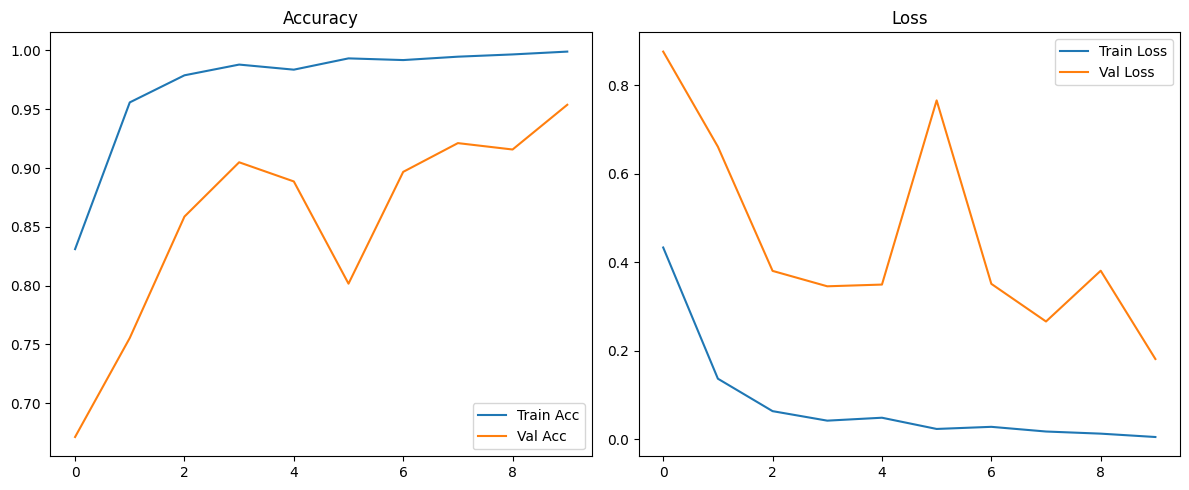

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 306ms/step - accuracy: 0.9636 - loss: 0.1520
✅ Test Accuracy: 0.9608
📉 Test Loss: 0.1502
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step

In [ ]:
import os
import glob
import h5py
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input, Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# ======================
# ⚙️ Parameters
# ======================
DATASET_PATH = "/kaggle/input/figshare-datset"
IMAGE_PATH = "/kaggle/working/brain_tumor_images_xception"
IMG_SIZE = (299, 299)   # Xception expects 299x299
BATCH_SIZE = 32
EPOCHS = 10

os.makedirs(IMAGE_PATH, exist_ok=True)

# ======================
# 🗂 Step 0: Convert .mat → .png
# ======================
mat_files = glob.glob(os.path.join(DATASET_PATH, "**", "*.mat"), recursive=True)
print(f"Found {len(mat_files)} .mat files to process")

for f in mat_files:
    try:
        with h5py.File(f, "r") as mat:
            cjdata = mat["cjdata"]

            image = np.array(cjdata["image"]).T
            label = int(np.array(cjdata["label"])[0][0])  # 1=meningioma, 2=glioma, 3=pituitary

            if label == 1:
                cls = "meningioma"
            elif label == 2:
                cls = "glioma"
            elif label == 3:
                cls = "pituitary"
            else:
                cls = "unknown"

            out_dir = os.path.join(IMAGE_PATH, cls)
            os.makedirs(out_dir, exist_ok=True)

            img_norm = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype("uint8")
            out_name = os.path.join(out_dir, os.path.basename(f).replace(".mat", ".png"))
            cv2.imwrite(out_name, img_norm)

    except Exception as e:
        print(f"⚠️ Error reading {f}: {e}")

print("✅ Conversion complete. Images are stored in:", IMAGE_PATH)

# ======================
# 🧠 Step 1: Collect all images
# ======================
image_paths = glob.glob(os.path.join(IMAGE_PATH, "**", "*.png"), recursive=True)
if len(image_paths) == 0:
    raise ValueError("❌ No images found after conversion!")

labels = [os.path.basename(os.path.dirname(p)) for p in image_paths]
df = pd.DataFrame({'filename': image_paths, 'class': labels})

NUM_CLASSES = df['class'].nunique()
print(f"✅ Found {len(df)} images across {NUM_CLASSES} classes")
print("🧾 Class distribution:\n", df['class'].value_counts())

# ======================
# 🧪 Step 2: Split dataset
# ======================
train_df, test_df = train_test_split(df, stratify=df['class'], test_size=0.20, random_state=42)
train_df, val_df = train_test_split(train_df, stratify=train_df['class'], test_size=0.15, random_state=42)
print(f"📊 Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

# ======================
# 🔄 Step 3: Data generators
# ======================
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_dataframe(train_df, x_col='filename', y_col='class',
                                              target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                              class_mode='categorical')
val_gen = valid_datagen.flow_from_dataframe(val_df, x_col='filename', y_col='class',
                                            target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                            class_mode='categorical')
test_gen = test_datagen.flow_from_dataframe(test_df, x_col='filename', y_col='class',
                                            target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                            class_mode='categorical', shuffle=False)

# ======================
# 🔧 Step 4: Build Xception model
# ======================
base_model = Xception(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
preds = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=preds)

# ======================
# ⚙️ Step 5: Compile
# ======================
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ======================
# 📦 Step 6: Callbacks
# ======================
checkpoint = ModelCheckpoint('xception_best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# ======================
# 🏋️ Step 7: Train
# ======================
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=EPOCHS,
                    callbacks=[checkpoint])

# ======================
# 📈 Step 8: Plot history
# ======================
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# ======================
# 🧪 Step 9: Evaluate on test set
# ======================
loss, acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {acc:.4f}")
print(f"📉 Test Loss: {loss:.4f}")

# ======================
# 🧾 Step 10: Classification report & confusion matrix
# ======================
y_true = test_gen.classes
y_pred = np.argmax(model.predict(test_gen), axis=1)
class_labels = list(test_gen.class_indices.keys())

print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
